# 학생 분류 

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [372]:
stu_df = pd.read_csv('./data/학생건강검사 결과분석 rawdata_서울_2015.csv', encoding='cp949')
stu_df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,...,172.1,60.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,...,139.7,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,...,179.0,78.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,137.0,29.2,NaN,NaN,NaN,NaN,NaN,NaN,91.0,63.0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,...,154.9,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
stu_df.shape

(9682, 25)

In [375]:
stu_info = stu_df[['학교명','성별','키','몸무게']]
stu_info.head()

,학교명,성별,키,몸무게
0,신서고등학교,남,172.1,60.5
1,서울난향초등학교,남,139.7,44.5
2,한영외국어고등학교,남,179.0,78.9
3,서울대도초등학교,남,137.0,29.2
4,불광중학교,남,154.9,53.5


In [377]:
print(type(stu_info))

<class 'pandas.core.frame.DataFrame'>


In [378]:
stu_info.isnull().sum(0)

학교명    0
성별     0
키      0
몸무게    0
dtype: int64

In [379]:
from sklearn.preprocessing import LabelEncoder

In [380]:
X = stu_info.drop(['학교명'], axis=1)
X.head()

,성별,키,몸무게
0,남,172.1,60.5
1,남,139.7,44.5
2,남,179.0,78.9
3,남,137.0,29.2
4,남,154.9,53.5


In [381]:
y = stu_info['학교명']
y.head()

0       신서고등학교
1     서울난향초등학교
2    한영외국어고등학교
3     서울대도초등학교
4        불광중학교
Name: 학교명, dtype: object

In [382]:
#남자를 0 여자를 1 
encoder = LabelEncoder()
#레이블 인코딩
X['성별'] = encoder.fit_transform(X['성별'])
X

,성별,키,몸무게
0,0,172.1,60.5
1,0,139.7,44.5
2,0,179.0,78.9
3,0,137.0,29.2
4,0,154.9,53.5
...,...,...,...
9677,1,150.8,37.4
9678,1,156.7,79.3
9679,1,148.5,40.2
9680,1,138.4,41.4


In [383]:
#X의 학교를 원핫 벡터로 정리 
#초등학교 - 0
#중학교 - 1
#고등학교 - 2
y

0          신서고등학교
1        서울난향초등학교
2       한영외국어고등학교
3        서울대도초등학교
4           불광중학교
          ...    
9677       경기초등학교
9678     성심여자고등학교
9679     서울길원초등학교
9680       경기초등학교
9681        도곡중학교
Name: 학교명, Length: 9682, dtype: object

In [384]:

y[y.str.endswith("초등학교", na= False)]= 0       
    
    

C:\Users\admin\AppData\Local\Temp/ipykernel_17256/2307059529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y.str.endswith("초등학교", na= False)]= 0
C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [385]:
y

0          신서고등학교
1               0
2       한영외국어고등학교
3               0
4           불광중학교
          ...    
9677            0
9678     성심여자고등학교
9679            0
9680            0
9681        도곡중학교
Name: 학교명, Length: 9682, dtype: object

In [386]:
y[y.str.endswith("중학교", na= False)]= 1  

C:\Users\admin\AppData\Local\Temp/ipykernel_17256/1056172834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y.str.endswith("중학교", na= False)]= 1


In [387]:
y[y.str.endswith("고등학교", na= False)]= 2

C:\Users\admin\AppData\Local\Temp/ipykernel_17256/3623742705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y.str.endswith("고등학교", na= False)]= 2


In [388]:
y

0       2
1       0
2       2
3       0
4       1
       ..
9677    0
9678    2
9679    0
9680    0
9681    1
Name: 학교명, Length: 9682, dtype: object

In [389]:
y = y.astype('float32')
y

0       2.0
1       0.0
2       2.0
3       0.0
4       1.0
       ... 
9677    0.0
9678    2.0
9679    0.0
9680    0.0
9681    1.0
Name: 학교명, Length: 9682, dtype: float32

In [390]:
from sklearn.model_selection import train_test_split

In [391]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)
print(x_train.shape)
print(x_test.shape)

(6777, 3)
(2905, 3)


In [392]:
import tensorflow as tf
from tensorflow import keras


In [393]:
model = keras.Sequential([keras.layers.Dense(3), keras.layers.Dense(128,activation='relu'), keras.layers.Dense(3, activation='softmax')])

In [394]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])


In [395]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


In [396]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

212/212 [==============================] - 0s 2ms/step - loss: 0.9767 - accuracy: 0.5457 - val_loss: 0.8143 - val_accuracy: 0.6358
Epoch 2/20
212/212 [==============================] - 0s 2ms/step - loss: 0.8191 - accuracy: 0.5979 - val_loss: 0.7690 - val_accuracy: 0.6341
Epoch 3/20
212/212 [==============================] - 0s 2ms/step - loss: 0.8204 - accuracy: 0.6022 - val_loss: 0.8108 - val_accuracy: 0.5931
Epoch 4/20
212/212 [==============================] - 0s 2ms/step - loss: 0.8211 -

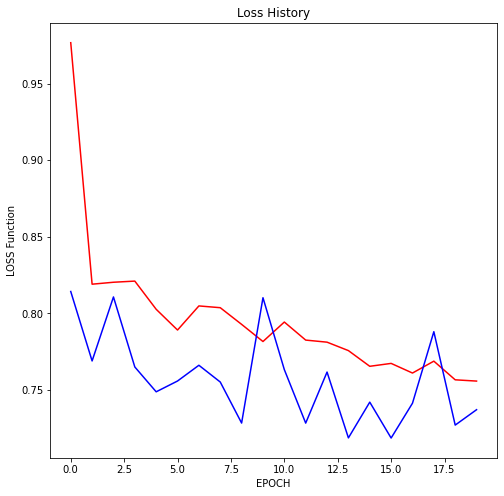

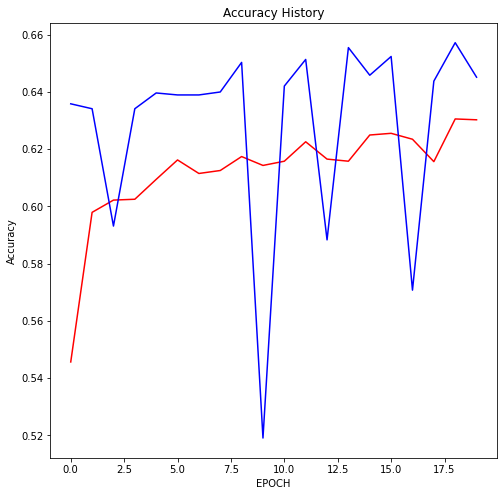

In [397]:
import matplotlib.pyplot as plt 

train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

# 붓꽃 분류

In [398]:
flower_df = pd.read_csv('./data/iris.csv')
flower_df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [399]:
flower_df['Iris-setosa'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

In [400]:
X= flower_df.drop('Iris-setosa', axis=1)
X

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [401]:


y = flower_df['Iris-setosa']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Iris-setosa, Length: 149, dtype: object

In [402]:
#y를 바꿔줄겁니다! 

from sklearn.preprocessing import LabelEncoder

enco = LabelEncoder()
y = enco.fit_transform(y)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [403]:
print(y.shape)

(149,)


In [404]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [405]:
model = keras.Sequential([keras.layers.Dense(3),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dropout(rate=0.5),
                          keras.layers.Dense(3, activation='softmax') ])

In [406]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [407]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [408]:
history2 = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4/4 [==============================] - 0s 24ms/step - loss: 1.6929 - accuracy: 0.3654 - val_loss: 1.1398 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 1.3803 - accuracy: 0.3942 - val_loss: 0.9796 - val_accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 0s 5ms/step - loss: 1.3562 - accuracy: 0.4231 - val_loss: 0.8887 - val_accuracy: 0.8667
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 1.3833 - accuracy: 0.39

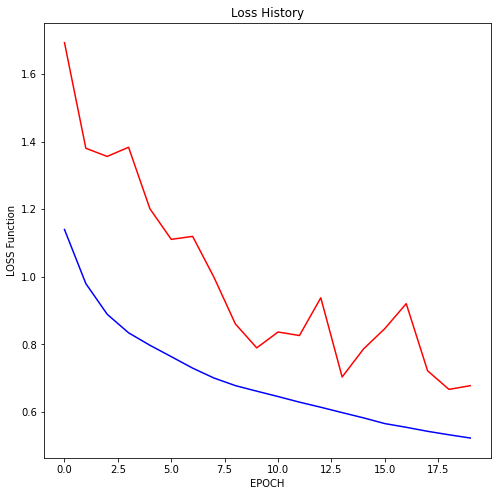

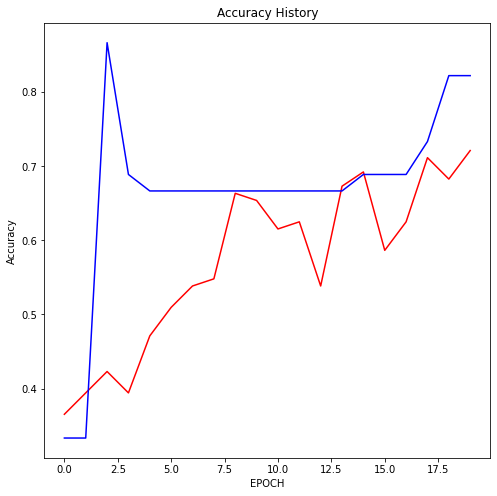

In [409]:
train_history = history2.history["loss"]
validation_history = history2.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history2.history["accuracy"]
validation_history = history2.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

# 회귀 

In [550]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [551]:
data_df = pd.read_csv('./data/육군신체측정정보.csv', encoding='cp949')
data_df.head()

C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [552]:
X = data_df.drop(['순번','측정 일자'], axis=1)
X.head()

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [553]:
X['허리 둘레 센티미터'] = X['허리 둘레 센티미터']+"("
X['허리 둘레 센티미터']

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [554]:
#String으로 들어간 값 찾았음. 바꿔주기 

X['허리 둘레 센티미터'] = X['허리 둘레 센티미터'].astype('string')



In [555]:
X['허리 둘레 센티미터'] = X['허리 둘레 센티미터']+"("


In [556]:
X['허리 둘레 센티미터']

0                   82.5(
1                   81.2(
2                   99.2(
3                   85.9(
4                   78.3(
               ...       
167975    86.7 (34.1 in)(
167976    90.5 (35.6 in)(
167977    94.3 (37.1 in)(
167978    75.9 (29.9 in)(
167979    73.0 (28.7 in)(
Name: 허리 둘레 센티미터, Length: 167980, dtype: string

In [557]:
# X['허리 둘레 센티미터'] = X['허리 둘레 센티미터'].str.split("(")
# X['허리 둘레 센티미터']

size =[]
for i in X['허리 둘레 센티미터']:
    a = i.split("(")
    size.append(a[0])


In [558]:
X['허리 둘레']=size
X

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,허리 둘레
0,96.3,92.6,185.5,82.5(,83.8,57.1,28.5,73.2,82.5
1,101.9,83.8,167.2,81.2(,74.4,55.0,24.2,65.1,81.2
2,99.5,89.6,179.9,99.2(,84.2,56.3,28.1,93.2,99.2
3,98.6,85.5,171.4,85.9(,76.4,54.5,27.4,71.6,85.9
4,94.7,88.1,176.9,78.3(,79.7,58.5,26.5,67.1,78.3
...,...,...,...,...,...,...,...,...,...
167975,100.6,86.4,173.2,86.7 (34.1 in)(,77.1,56.9,27.1,73.7,86.7
167976,97.9,82.7,166.3,90.5 (35.6 in)(,73.4,61.5,28.8,70.7,90.5
167977,97.9,87.2,175.2,94.3 (37.1 in)(,83.1,57.1,27.6,78.7,94.3
167978,85.3,86.8,173.6,75.9 (29.9 in)(,76.6,57.6,24.3,57.4,75.9


In [559]:
X = X.drop(['허리 둘레 센티미터'], axis=1)
X

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,허리 둘레
0,96.3,92.6,185.5,83.8,57.1,28.5,73.2,82.5
1,101.9,83.8,167.2,74.4,55.0,24.2,65.1,81.2
2,99.5,89.6,179.9,84.2,56.3,28.1,93.2,99.2
3,98.6,85.5,171.4,76.4,54.5,27.4,71.6,85.9
4,94.7,88.1,176.9,79.7,58.5,26.5,67.1,78.3
...,...,...,...,...,...,...,...,...
167975,100.6,86.4,173.2,77.1,56.9,27.1,73.7,86.7
167976,97.9,82.7,166.3,73.4,61.5,28.8,70.7,90.5
167977,97.9,87.2,175.2,83.1,57.1,27.6,78.7,94.3
167978,85.3,86.8,173.6,76.6,57.6,24.3,57.4,75.9


In [560]:
X.shape

(167980, 8)

In [561]:
X = X.astype('float32')

In [562]:
y = data_df['몸무게 킬로그램']
y.head()
print(y.shape)

(167980,)


In [563]:
y

0         73.2
1         65.1
2         93.2
3         71.6
4         67.1
          ... 
167975    73.7
167976    70.7
167977    78.7
167978    57.4
167979    51.7
Name: 몸무게 킬로그램, Length: 167980, dtype: float64

In [564]:
y= y.astype('float32')

In [565]:
#훈련, 테스트 데이터 분할 
from sklearn.model_selection import train_test_split

In [566]:
#분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [567]:
model = keras.Sequential([keras.layers.Dense(3), 
                          keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(3, activation='softmax')])

In [568]:
model.compile(loss='mse', optimizer='Adam', metrics=['mse'])

In [569]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/20
3675/3675 [==============================] - 8s 2ms/step - loss: 5343.4263 - mse: 5343.4263 - val_loss: 5356.8262 - val_mse: 5356.8262
Epoch 2/20
3675/3675 [==============================] - 8s 2ms/step - loss: 5343.4253 - mse: 5343.4253 - val_loss: 5356.8262 - val_mse: 5356.8262
Epoch 3/20
3675/3675 [==============================] - 7s 2ms/step - loss: 5343.4263 - mse: 5343.4263 - val_loss: 5356.8262 - val_mse: 5356.8262
Epoch 4/20
3675/3675 [==============================] - 8s 2ms/step - loss: 5343.4277 - mse: 5343.4277 - val_loss: 5356.8262 - val_mse: 5356.8262
Epoch 5/20
3675/3675 [==============================] - 7s 2ms/step - loss: 5343.4258 - mse: 5343.4258 - val_loss: 5356.8262 - val_mse: 5356.8262
Epoch 6/20
3675/3675 [==============================] - 8s 2ms/step - loss: 5343.4346 - mse: 5343.4346 - val_loss: 5356.8262 - val_mse: 5356.8262
Epoch 7/20
3675/3675 [==============================] - 7s 2ms/step - loss: 5343.4307 - mse: 5343.4307 - val_loss: 5356.8262

In [582]:
import numpy as np

In [587]:
print(x_test.shape)
print(y_test.shape)

(50394, 8)
(50394,)


In [583]:
a = model(x_test.to_numpy())

In [584]:
predict = model.predict(x_test)

In [585]:
def draw_graph(prediction, label, history):
    X = prediction / np.max(prediction, axis=0)
    Y = label / np.max(label, axis=0)

    minval = min(np.min(X), np.min(Y))
    maxval = max(np.max(X), np.max(Y))

    fig = plt.figure(figsize=(8, 8))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(X, Y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")

    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")


ValueError: x and y must be the same size

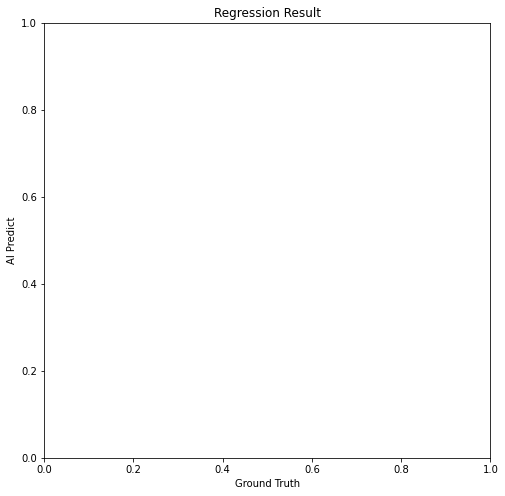

In [586]:
draw_graph(a, y_test, history)

# 비만도 분석 

In [611]:
info_df = pd.read_csv('./data/육군신체측정정보.csv', encoding='cp949')
info_df.head()

C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [612]:
X = info_df.drop(['순번','측정 일자'], axis=1)
X

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...
167975,100.6,86.4,173.2,86.7 (34.1 in),77.1,56.9,27.1,73.7
167976,97.9,82.7,166.3,90.5 (35.6 in),73.4,61.5,28.8,70.7
167977,97.9,87.2,175.2,94.3 (37.1 in),83.1,57.1,27.6,78.7
167978,85.3,86.8,173.6,75.9 (29.9 in),76.6,57.6,24.3,57.4


In [613]:
X['허리 둘레 센티미터'] = X['허리 둘레 센티미터'].astype('string')
X['허리 둘레 센티미터'] = X['허리 둘레 센티미터']+"("

waist_size=[]
for i in X['허리 둘레 센티미터']:
    size=i.split('(')
    waist_size.append(size[0])
    
    
X['허리 둘레'] = waist_size
X.head()

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,허리 둘레
0,96.3,92.6,185.5,82.5(,83.8,57.1,28.5,73.2,82.5
1,101.9,83.8,167.2,81.2(,74.4,55.0,24.2,65.1,81.2
2,99.5,89.6,179.9,99.2(,84.2,56.3,28.1,93.2,99.2
3,98.6,85.5,171.4,85.9(,76.4,54.5,27.4,71.6,85.9
4,94.7,88.1,176.9,78.3(,79.7,58.5,26.5,67.1,78.3


In [614]:
X = X.drop(['허리 둘레 센티미터','신장 센티미터','몸무게 킬로그램'], axis=1)
X

,가슴 둘레 센티미터,소매길이 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,허리 둘레
0,96.3,92.6,83.8,57.1,28.5,82.5
1,101.9,83.8,74.4,55.0,24.2,81.2
2,99.5,89.6,84.2,56.3,28.1,99.2
3,98.6,85.5,76.4,54.5,27.4,85.9
4,94.7,88.1,79.7,58.5,26.5,78.3
...,...,...,...,...,...,...
167975,100.6,86.4,77.1,56.9,27.1,86.7
167976,97.9,82.7,73.4,61.5,28.8,90.5
167977,97.9,87.2,83.1,57.1,27.6,94.3
167978,85.3,86.8,76.6,57.6,24.3,75.9


In [619]:
#노멀라이즈
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [620]:
y = info_df[['몸무게 킬로그램','신장 센티미터']]
y

,몸무게 킬로그램,신장 센티미터
0,73.2,185.5
1,65.1,167.2
2,93.2,179.9
3,71.6,171.4
4,67.1,176.9
...,...,...
167975,73.7,173.2
167976,70.7,166.3
167977,78.7,175.2
167978,57.4,173.6


In [621]:
#노멀라이즈 
y[:] = scaler.fit_transform(y[:])
X[:] = scaler.fit_transform(X[:])

C:\Users\admin\AppData\Local\Temp/ipykernel_17256/1388645076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[:] = scaler.fit_transform(y[:])
C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [622]:
y

,몸무게 킬로그램,신장 센티미터
0,0.542222,0.712054
1,0.482222,0.303571
2,0.690370,0.587054
3,0.530370,0.397321
4,0.497037,0.520089
...,...,...
167975,0.545926,0.437500
167976,0.523704,0.283482
167977,0.582963,0.482143
167978,0.425185,0.446429


In [623]:
X

,가슴 둘레 센티미터,소매길이 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,허리 둘레
0,0.329231,0.688889,0.796524,0.001292,0.828313,0.347094
1,0.415385,0.297778,0.700409,0.000760,0.698795,0.336142
2,0.378462,0.555556,0.800613,0.001090,0.816265,0.487784
3,0.364615,0.373333,0.720859,0.000634,0.795181,0.375737
4,0.304615,0.488889,0.754601,0.001647,0.768072,0.311710
...,...,...,...,...,...,...
167975,0.395385,0.413333,0.728016,0.001242,0.786145,0.382477
167976,0.353846,0.248889,0.690184,0.002408,0.837349,0.414490
167977,0.353846,0.448889,0.789366,0.001292,0.801205,0.446504
167978,0.160000,0.431111,0.722904,0.001419,0.701807,0.291491


In [624]:
from sklearn.model_selection import train_test_split

In [625]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=25)

In [626]:
model = keras.Sequential([keras.layers.Dense(6), keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(2, activation='sigmoid')])

In [627]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [628]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4200/4200 [==============================] - 8s 2ms/step - loss: 9.3127e-04 - mae: 0.0213 - val_loss: 6.9903e-04 - val_mae: 0.0185
Epoch 2/20
4200/4200 [==============================] - 8s 2ms/step - loss: 7.3594e-04 - mae: 0.0192 - val_loss: 7.2910e-04 - val_mae: 0.0189
Epoch 3/20
4200/4200 [==============================] - 8s 2ms/step - loss: 7.1923e-04 - mae: 0.0189 - val_loss: 7.4518e-04 - val_mae: 0.0191
Epoch 4/20
4200/4200 [==============================] - 8s 2ms/step - loss: 7.1030